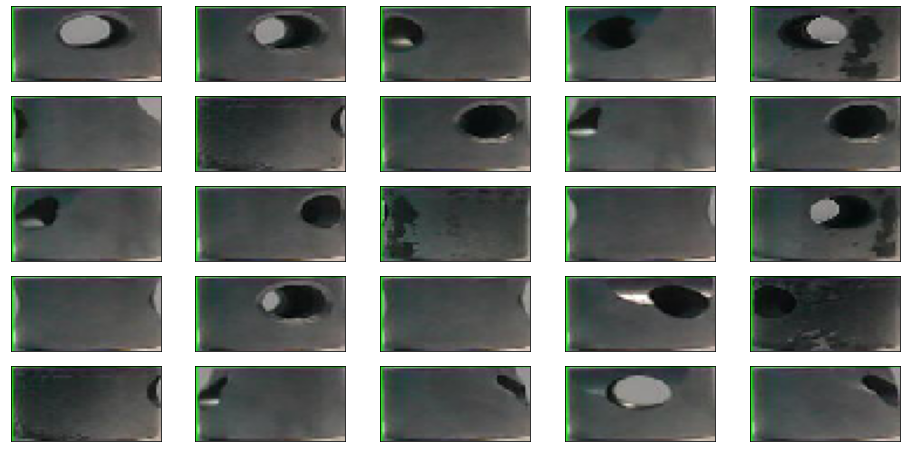

In [1]:
# This function plots images from a folder. 

import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random

def plot_images(source_path):
    files=[]
    classes = glob.glob(source_path + '/*')
    for class_path in classes:
        files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])
    random.shuffle(files)
    plt.figure(figsize=(16, 8))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = image.load_img(files[i], target_size=(32, 64))
        plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    
plot_images('data/train_data')

In [2]:
IMG_HEIGHT = 80
IMG_WIDTH = 80

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(directory='data/train_data',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 228 images belonging to 3 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Dense(24, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Flatten(),
    Dense(3)
])

In [4]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80, 80, 24)        96        
                                                                 
 flatten (Flatten)           (None, 153600)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 460803    
                                                                 
Total params: 460,899
Trainable params: 460,899
Non-trainable params: 0
_________________________________________________________________


/home/studio-lab-user/.conda/envs/test_env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
history = model.fit_generator(train_data_gen, epochs=25)

Epoch 1/25


<ipython-input-5-a114e64f35da>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=25)


8/8 [==============================] - 1s 33ms/step - loss: 4.9274 - accuracy: 0.3289
Epoch 2/25
8/8 [==============================] - 0s 30ms/step - loss: 2.8738 - accuracy: 0.3377
Epoch 3/25
8/8 [==============================] - 0s 28ms/step - loss: 1.6641 - accuracy: 0.4430
Epoch 4/25
8/8 [==============================] - 0s 27ms/step - loss: 0.8663 - accuracy: 0.5439
Epoch 5/25
8/8 [==============================] - 0s 26ms/step - loss: 0.6134 - accuracy: 0.7281
Epoch 6/25
8/8 [==============================] - 0s 28ms/step - loss: 0.4368 - accuracy: 0.7675
Epoch 7/25
8/8 [==============================] - 0s 28ms/step - loss: 0.3435 - accuracy: 0.8553
Epoch 8/25
8/8 [==============================] - 0s 29ms/step - loss: 0.2648 - accuracy: 0.9123
Epoch 9/25
8/8 [==============================] - 0s 26ms/step - loss: 0.1534 - accuracy: 0.9781
Epoch 10/25
8/8 [==============================] - 0s 28ms/step - loss: 0.1064 - accuracy: 0.9825
Epoch 11/25
8/8 [=======================

In [6]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(directory='data/test_data',
                                                         shuffle=False,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='categorical')

loss, accuracy = model.evaluate(test_data_gen)
print("loss: %f, accuracy: %f" % (loss, accuracy))

Found 57 images belonging to 3 classes.
2/2 [==============================] - 0s 15ms/step - loss: 0.0952 - accuracy: 0.9825
loss: 0.095239, accuracy: 0.982456


In [7]:
import pickle
file_pickle = open('model.pkl', 'wb')
pickle.dump(model, file_pickle)
file_pickle.close()

INFO:tensorflow:Assets written to: ram://baa241b0-29e2-4d29-96d1-9598f4e215cd/assets


In [8]:
import tensorflow as tf
import numpy as np

path = './data/test_data/normal/normal_98.jpeg'
img = tf.keras.preprocessing.image.load_img(path, target_size=(80,80))
inputarr = tf.keras.preprocessing.image.img_to_array(img)
test = np.array([inputarr])

label = {0: 'Normal', 1: 'Defect 1', 2: 'Defect 2'}

new_model_file = open('model.pkl', 'rb')
model = pickle.load(new_model_file)

prediction = model.predict(test)
#print(label[model.predict(test)[0]])
prediction

array([[ 1837.8256 , -1296.2804 ,   637.30566]], dtype=float32)

In [13]:
import keras

img = keras.preprocessing.image.load_img('./data/test_data/normal/normal_98.jpeg', target_size=(80,80))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

TypeError: only size-1 arrays can be converted to Python scalars